<a href="https://colab.research.google.com/github/Number1MarsMan/googleColabProjects/blob/main/AddedEVData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: pip install kaggle

!pip install kaggle


In [2]:
# prompt: # prompt: download the databse from the website https://www.kaggle.com/datasets/sahirmaharajj/electric-vehicle-population and save into an array

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Assuming you have already configured Kaggle API and the kaggle.json is in the correct location.
!kaggle datasets download -d sahirmaharajj/electric-vehicle-population

# Unzip the downloaded file
!unzip electric-vehicle-population.zip

# Load the dataset into a pandas DataFrame
data = pd.read_csv('Electric_Vehicle_Population_Data.csv')  # Replace with the actual filename if different

# Convert the DataFrame to a NumPy array
data_array = data.values

# Now data_array holds the data from the CSV file in a NumPy array format.
data_array


Dataset URL: https://www.kaggle.com/datasets/sahirmaharajj/electric-vehicle-population
License(s): apache-2.0
 53% 3.00M/5.67M [00:00<00:00, 5.52MB/s]
100% 5.67M/5.67M [00:00<00:00, 7.91MB/s]
Archive:  electric-vehicle-population.zip
  inflating: Electric_Vehicle_Population_Data.csv  


array([['5YJYGDEE1L', 'King', 'Seattle', ...,
        'POINT (-122.30839 47.610365)',
        'CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)', 53033007800.0],
       ['7SAYGDEE9P', 'Snohomish', 'Bothell', ...,
        'POINT (-122.179458 47.802589)', 'PUGET SOUND ENERGY INC',
        53061051938.0],
       ['5YJSA1E4XK', 'King', 'Seattle', ...,
        'POINT (-122.34848 47.632405)',
        'CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)', 53033006800.0],
       ...,
       ['5YJYGDEE6M', 'Grant', 'Quincy', ...,
        'POINT (-119.8493873 47.2339933)', 'PUD NO 2 OF GRANT COUNTY',
        53025010500.0],
       ['WVGKMPE27M', 'King', 'Black Diamond', ...,
        'POINT (-122.00451 47.312185)',
        'PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)', 53033031603.0],
       ['5YJ3E1EA8M', 'Pierce', 'Tacoma', ...,
        'POINT (-122.38578 47.28971)',
        'BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY',
        53053940005.0]], dtype=object)

In [21]:
# prompt: create a table that shows me how many of each type of electric vehicles there are, just make. and a second table of state

# Group by Make and count the number of vehicles for each make
make_counts = data.groupby('Make')['Make'].count()

# Create a table showing the counts of each make
print("Number of Electric Vehicles by Make:")
print(make_counts)

# Group by State and count the number of vehicles for each state
state_counts = data.groupby('State')['State'].count()

# Create a table showing the counts of each state
print("\nNumber of Electric Vehicles by State:")
state_counts


Number of Electric Vehicles by Make:
Make
AUDI                     3225
AZURE DYNAMICS              8
BENTLEY                     3
BMW                      6394
CADILLAC                  150
CHEVROLET               13631
CHRYSLER                 2890
FIAT                      784
FISKER                     49
FORD                     9196
GENESIS                   160
HONDA                     833
HYUNDAI                  4091
JAGUAR                    226
JEEP                     3520
KIA                      6868
LAND ROVER                 50
LEXUS                     255
LINCOLN                   266
LUCID                     238
MAZDA                       4
MERCEDES-BENZ            1476
MINI                      757
MITSUBISHI                951
NISSAN                  13925
POLESTAR                  783
PORSCHE                  1090
RIVIAN                   4113
SMART                     270
SUBARU                    831
TESLA                   79101
TH!NK                       

,State
State,
AE,1
AK,1
AL,6
AP,1
AR,2
AZ,10
BC,3
CA,101
CO,12


Number of Electric Vehicles by Year (Excluding 2024):
Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1618
2013     4408
2014     3509
2015     4844
2016     5483
2017     8561
2018    14322
2019    10939
2020    11768
2021    19132
2022    27776
2023    57587
Name: Model Year, dtype: int64


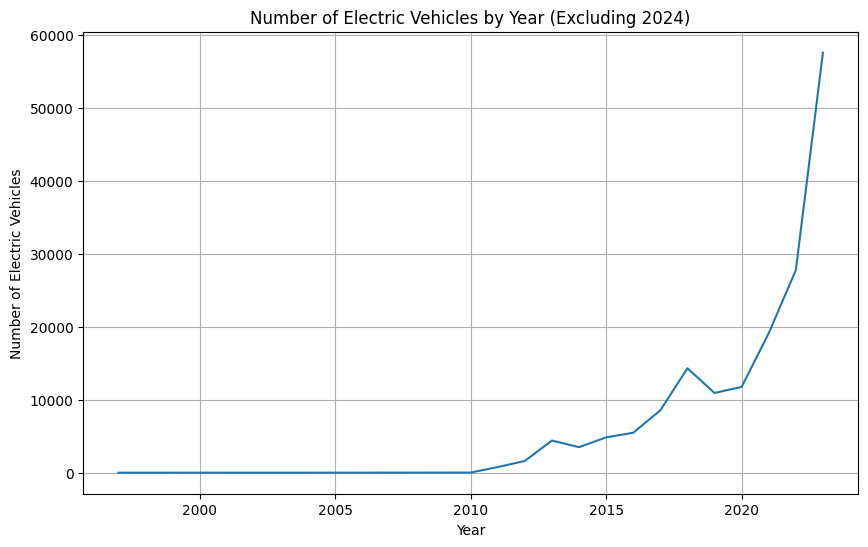

In [25]:
# prompt: now create a graph and table of number of electric vehicles by year not including 2024, and remove cars from states: AE, AP, BC

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset into a pandas DataFrame
data = pd.read_csv('Electric_Vehicle_Population_Data.csv')

# Remove cars from states AE, AP, BC
data = data[~data['State'].isin(['AE', 'AP', 'BC'])]

# Convert 'Model Year' to datetime and extract year
data['Model Year'] = pd.to_datetime(data['Model Year'], format='%Y', errors='coerce').dt.year

# Filter out 2024
data = data[data['Model Year'] != 2024]

# Group by Model Year and count the number of vehicles
year_counts = data.groupby('Model Year')['Model Year'].count()

# Create a table showing the counts of each year
print("Number of Electric Vehicles by Year (Excluding 2024):")
print(year_counts)

# Create a graph
plt.figure(figsize=(10, 6))
plt.plot(year_counts.index, year_counts.values)
plt.xlabel('Year')
plt.ylabel('Number of Electric Vehicles')
plt.title('Number of Electric Vehicles by Year (Excluding 2024)')
plt.grid(True)
plt.show()


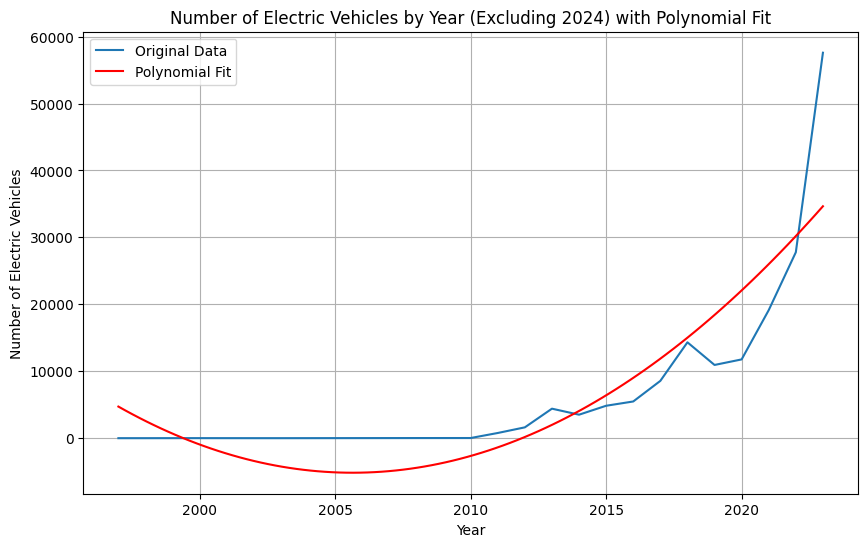

In [30]:
# prompt: now add a line of best fit that uses a polynomial

# Fit a polynomial of degree 2 to the data
coefficients = np.polyfit(year_counts.index, year_counts.values, 2)
polynomial = np.poly1d(coefficients)

# Generate x values for the line of best fit
x_values = np.linspace(year_counts.index.min(), year_counts.index.max(), 100)

# Calculate corresponding y values using the polynomial
y_values = polynomial(x_values)

# Plot the original data and the line of best fit
plt.figure(figsize=(10, 6))
plt.plot(year_counts.index, year_counts.values, label='Original Data')
plt.plot(x_values, y_values, color='red', label='Polynomial Fit')
plt.xlabel('Year')
plt.ylabel('Number of Electric Vehicles')
plt.title('Number of Electric Vehicles by Year (Excluding 2024) with Polynomial Fit')
plt.grid(True)
plt.legend()
plt.show()


   Year  Number of Electric Vehicles
0  2023                 57587.000000
1  2024                 39367.424607
2  2025                 44351.889103
3  2026                 49600.731121
4  2027                 55113.950660
5  2028                 60891.547720
6  2029                 66933.522302
7  2030                 73239.874406

Total Number of Electric Vehicles in 2030 (Extrapolated): 447085.939919889


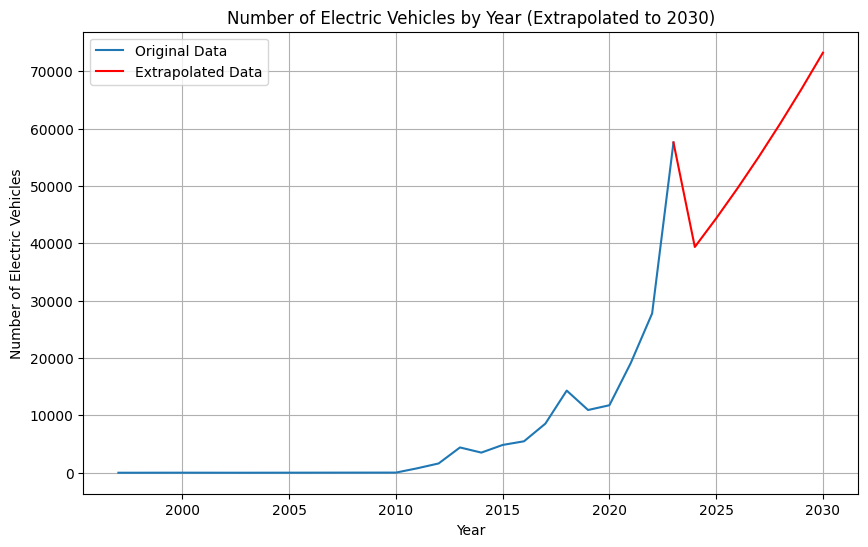

In [36]:
# prompt: now extrapolate it to 2030, and add a datapoint at every year then list in a table and sum them up, using actual data until 2023 then use the extrapolation curve

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ... (Previous code for loading and processing the data) ...


# Fit a polynomial of degree 2 to the data
coefficients = np.polyfit(year_counts.index, year_counts.values, 2)
polynomial = np.poly1d(coefficients)

# Extrapolate to 2030
extrapolated_years = list(range(2023, 2031))
extrapolated_counts = [year_counts.get(year, polynomial(year)) for year in extrapolated_years]


# Create a table
table_data = {
    "Year": extrapolated_years,
    "Number of Electric Vehicles": extrapolated_counts
}
df_table = pd.DataFrame(table_data)
print(df_table)


# Calculate the sum of extrapolated counts
total_ev_2030 = sum(extrapolated_counts)
print("\nTotal Number of Electric Vehicles in 2030 (Extrapolated):", total_ev_2030)


# Create a graph with extrapolated data
plt.figure(figsize=(10, 6))
plt.plot(year_counts.index, year_counts.values, label='Original Data')

# Plot the extrapolated values
plt.plot(extrapolated_years, extrapolated_counts, color='red', label='Extrapolated Data')

plt.xlabel('Year')
plt.ylabel('Number of Electric Vehicles')
plt.title('Number of Electric Vehicles by Year (Extrapolated to 2030)')
plt.grid(True)
plt.legend()
plt.show()


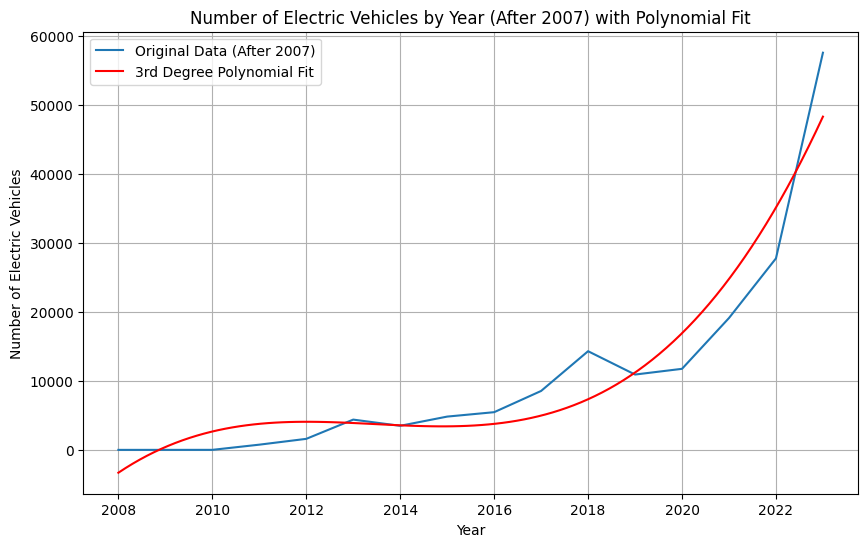

Estimated number of electric vehicles in 2030 (using data after 2007): 247274


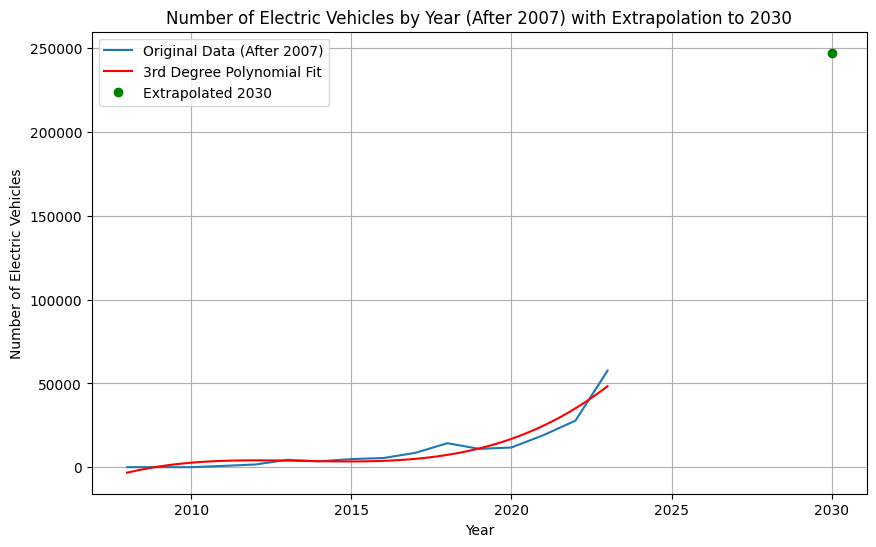

In [39]:
# prompt: Now redo the trendline ignoring the data before 2008, make it a 3rd degree polynomial

# ... (Your existing code) ...

# Filter data for years after 2007
year_counts_after_2007 = year_counts[year_counts.index >= 2008]

# Fit a 3rd degree polynomial to the filtered data
coefficients = np.polyfit(year_counts_after_2007.index, year_counts_after_2007.values, 3)
polynomial = np.poly1d(coefficients)

# Generate x values for the line of best fit
x_values = np.linspace(year_counts_after_2007.index.min(), year_counts_after_2007.index.max(), 100)

# Calculate corresponding y values using the polynomial
y_values = polynomial(x_values)

# Plot the original data and the line of best fit
plt.figure(figsize=(10, 6))
plt.plot(year_counts_after_2007.index, year_counts_after_2007.values, label='Original Data (After 2007)')
plt.plot(x_values, y_values, color='red', label='3rd Degree Polynomial Fit')
plt.xlabel('Year')
plt.ylabel('Number of Electric Vehicles')
plt.title('Number of Electric Vehicles by Year (After 2007) with Polynomial Fit')
plt.grid(True)
plt.legend()
plt.show()

# Extrapolate to 2030 using the new polynomial fit
year_2030 = 2030
ev_count_2030 = polynomial(year_2030)

print(f"Estimated number of electric vehicles in 2030 (using data after 2007): {ev_count_2030:.0f}")

# Plot the extrapolated data
plt.figure(figsize=(10, 6))
plt.plot(year_counts_after_2007.index, year_counts_after_2007.values, label='Original Data (After 2007)')
plt.plot(x_values, y_values, color='red', label='3rd Degree Polynomial Fit')
plt.plot(year_2030, ev_count_2030, 'go', label='Extrapolated 2030')  # Green circle for 2030
plt.xlabel('Year')
plt.ylabel('Number of Electric Vehicles')
plt.title('Number of Electric Vehicles by Year (After 2007) with Extrapolation to 2030')
plt.grid(True)
plt.legend()
plt.show()


   Year  Number of Electric Vehicles
0  2023                        57587
1  2024                        64647
2  2025                        84455
3  2026                       108074
4  2027                       135835
5  2028                       168069
6  2029                       205105
7  2030                       247273

Total Number of Electric Vehicles in 2030 (Extrapolated): 1071045


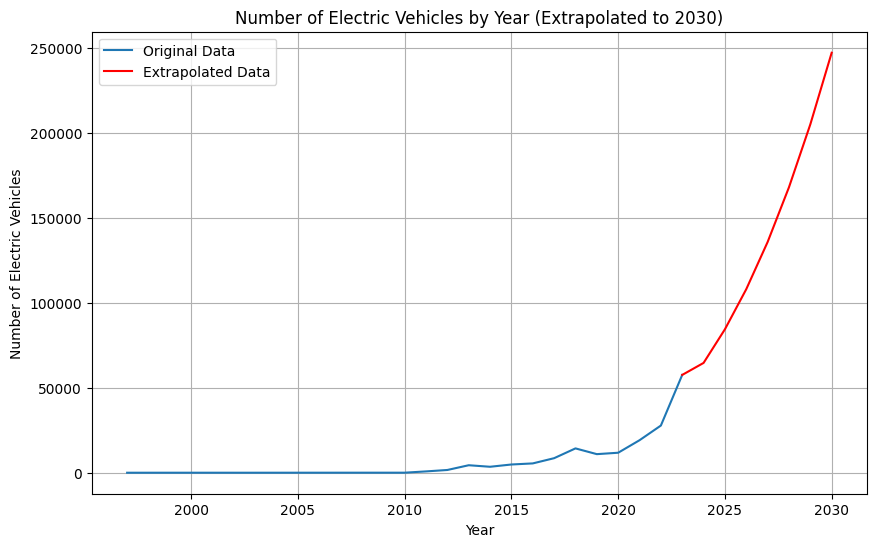

In [40]:
# prompt: now extrapolate it to 2030, and add a datapoint at every year then list in a table and sum them up, using actual data until 2023 then use the extrapolation curve using the 3rd degree polynomial trendline

# ... (Your existing code) ...

# Filter data for years after 2007
year_counts_after_2007 = year_counts[year_counts.index >= 2008]

# Fit a 3rd degree polynomial to the filtered data
coefficients = np.polyfit(year_counts_after_2007.index, year_counts_after_2007.values, 3)
polynomial = np.poly1d(coefficients)

# Extrapolate to 2030 using the new polynomial fit
extrapolated_years = list(range(2023, 2031))
extrapolated_counts = []

for year in extrapolated_years:
  if year <= 2023 and year in year_counts.index:
    extrapolated_counts.append(year_counts[year])
  else:
    extrapolated_counts.append(int(polynomial(year)))


# Create a table
table_data = {
    "Year": extrapolated_years,
    "Number of Electric Vehicles": extrapolated_counts
}
df_table = pd.DataFrame(table_data)
print(df_table)

# Calculate the sum of extrapolated counts
total_ev_2030 = sum(extrapolated_counts)
print("\nTotal Number of Electric Vehicles in 2030 (Extrapolated):", total_ev_2030)

# Create a graph with extrapolated data
plt.figure(figsize=(10, 6))
plt.plot(year_counts.index, year_counts.values, label='Original Data')

# Plot the extrapolated values
plt.plot(extrapolated_years, extrapolated_counts, color='red', label='Extrapolated Data')

plt.xlabel('Year')
plt.ylabel('Number of Electric Vehicles')
plt.title('Number of Electric Vehicles by Year (Extrapolated to 2030)')
plt.grid(True)
plt.legend()
plt.show()


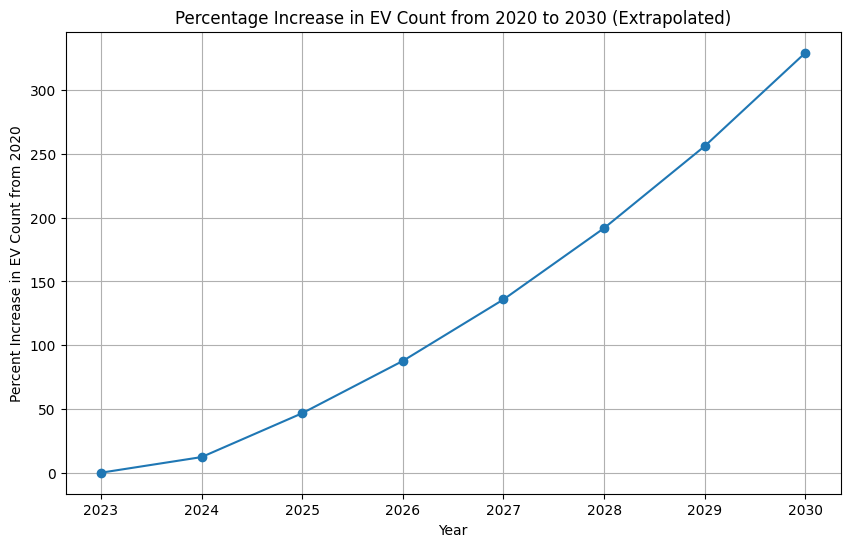

Year: 2023.0, Percent Increase: 0.00%
Year: 2024.0, Percent Increase: 12.26%
Year: 2025.0, Percent Increase: 46.66%
Year: 2026.0, Percent Increase: 87.67%
Year: 2027.0, Percent Increase: 135.88%
Year: 2028.0, Percent Increase: 191.85%
Year: 2029.0, Percent Increase: 256.17%
Year: 2030.0, Percent Increase: 329.39%


In [50]:
# prompt: now graph it as the percent increase in how many ev, starting in 2020, going to 2030 and write out the value

# ... (Your existing code) ...

# Filter data for years from 2020 to 2030 (extrapolated)
year_counts_2020_2030 = df_table[(df_table['Year'] >= 2020) & (df_table['Year'] <= 2030)]

# Calculate the percentage increase from 2020 to each subsequent year
year_counts_2020_2030['Percent Increase'] = ((year_counts_2020_2030['Number of Electric Vehicles'] - year_counts_2020_2030['Number of Electric Vehicles'].iloc[0]) / year_counts_2020_2030['Number of Electric Vehicles'].iloc[0]) * 100


# Create the graph
plt.figure(figsize=(10, 6))
plt.plot(year_counts_2020_2030['Year'], year_counts_2020_2030['Percent Increase'], marker='o')
plt.xlabel('Year')
plt.ylabel('Percent Increase in EV Count from 2020')
plt.title('Percentage Increase in EV Count from 2020 to 2030 (Extrapolated)')
plt.grid(True)
plt.show()

# Print the values with year and percentage increase
for index, row in year_counts_2020_2030.iterrows():
  print(f"Year: {row['Year']}, Percent Increase: {row['Percent Increase']:.2f}%")


Total Number of Electric Vehicles in 2030 (Extrapolated) for Washington: 1075000

Washington Population in 2030 8,000,000

In [58]:
# prompt: based on that text what percent of people in washington will have an EV

# Total Number of Electric Vehicles in 2030 (Extrapolated) for Washington: 1071045
# Washington Population in 2030 8,000,000

total_ev_2030 = 1075000
washington_population_2030 = 8500000

percent_ev_washington = (total_ev_2030 / washington_population_2030) * 100

print(f"Estimated percentage of people in Washington with an EV in 2030: {percent_ev_washington:.2f}%")


Estimated percentage of people in Washington with an EV in 2030: 12.65%


In [59]:
# prompt: now using the estimated us population in 2030 use the percent calculated to find the expected number of evs in the united states

# Assuming you have the extrapolated total EV count for 2030 and the estimated US population for 2030
total_ev_2030 = 1075000  # Replace with the actual extrapolated value
us_population_2030 = 350000000  # Replace with the estimated US population in 2030

# Calculate the expected number of EVs in the US
expected_evs_us = (total_ev_2030 / washington_population_2030) * us_population_2030

print(f"Expected number of EVs in the United States in 2030: {expected_evs_us:.0f}")


Expected number of EVs in the United States in 2030: 44264706
